In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,roc_curve,auc,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer



# LOGISTIC REGRESSION

In [15]:
data=load_breast_cancer()
X=data.data
y=data.target
feature_name=data.feature_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)







# BASIC MODEL

In [17]:
basic=LogisticRegression(max_iter=2000)
basic.fit(X_train,y_train)
print("basic accuracy",accuracy_score(y_test,basic.predict(X_test)))

basic accuracy 0.9824561403508771


# L1 REGULARISATION

In [18]:
l1=LogisticRegression(penalty='l1',solver='liblinear',max_iter=2000)
l1.fit(X_train,y_train)
print("L1 Accuracy: ",accuracy_score(y_test, l1.predict(X_test)))

L1 Accuracy:  0.9824561403508771


# L12 REGULARISATION

In [19]:
l2=LogisticRegression(penalty='l2',solver='liblinear',max_iter=2000)
l2.fit(X_train,y_train)
print("L2 Accuracy: ",accuracy_score(y_test, l2.predict(X_test)))

L2 Accuracy:  0.9824561403508771


# REGULARISATION STRENGTH

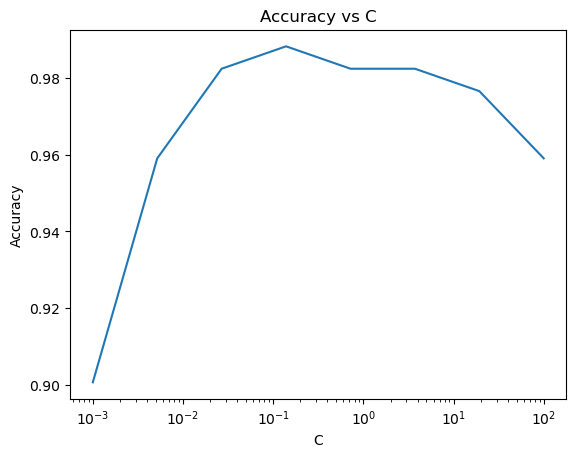

In [29]:
C_values=np.logspace(-3,2,8)
acc_list=[]
for C in C_values:
    model=LogisticRegression(C=C,max_iter=2000)
    model.fit(X_train,y_train)
    acc_list.append(accuracy_score(y_test,model.predict(X_test)))
plt.figure()
plt.plot(C_values,acc_list)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Accuracy vs C')
plt.show()    

# ROC CURVE

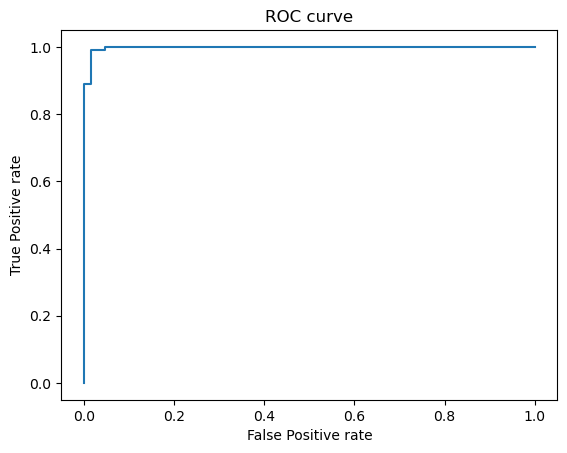

AUC: 0.9979423868312757


In [30]:
y_prob=l2.predict_proba(X_test)[:,1]
fpr,tpr,_=roc_curve(y_test,y_prob)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC curve')
plt.show() 
print("AUC:",roc_auc)

# CONFUSION MATRIX

In [31]:
print("Confusion Matrix: \n",confusion_matrix(y_test,l2.predict(X_test)))

Confusion Matrix: 
 [[ 62   1]
 [  2 106]]


# CROSS VALIDATION

In [32]:
cv_score=cross_val_score(LogisticRegression(max_iter=2000),
                         scaler.fit_transform(X),y,cv=5)
print("Cross validation Accuracy",cv_score.mean())

Cross validation Accuracy 0.9806862288464524


# BIAS VARIANCE CHECK

In [33]:
train_acc=accuracy_score(y_train,l2.predict(X_train))
test_acc=accuracy_score(y_test,l2.predict(X_test))
print("Train Accuracy",train_acc)
print("Test Accuracy",test_acc)

Train Accuracy 0.9874371859296482
Test Accuracy 0.9824561403508771
